In [15]:
# import sys
# sys.path.append('..') 
# from functions import data_separation 
import pandas as pd
import numpy as np
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow-io


In [5]:
path = '/kaggle/input/csv-data/convinados_sin_duplicados.csv'
df = pd.read_csv(path,index_col='Unnamed: 0')

In [6]:
if 'binary_array' not in  locals():
    
    df['binary'] = df['binary'].apply(json.loads)
   
    binary_array = np.array(df['binary'])

# Ejemplo de secuencias
sequences = binary_array

# Aplicar padding a las secuencias
binary_matriz = pad_sequences(sequences, padding='post')

print(type(binary_matriz))  # Imprime <class 'numpy.ndarray'>
print((binary_matriz.shape))


<class 'numpy.ndarray'>
(838, 5244)


In [7]:

# Datos de ejemplo
array_strings = np.array(df['translation'])

# Paso 1: Crear una instancia de CountVectorizer
vectorizer = CountVectorizer()

# Paso 2: Ajustar y transformar los datos
matriz_conteo = vectorizer.fit_transform(array_strings)

text_matriz = matriz_conteo.toarray()

print(text_matriz.shape)

(838, 10299)


In [8]:
def data_separation(arr_train,arr_leabel):
    if len(arr_leabel) == len(arr_leabel):
        sep_1 = int(len(arr_train)*.7)
        sep_2 = int(len(arr_train)*.7)+int((len(arr_train)-int(len(arr_train)*.7))/2)
        tra_x = arr_train[:sep_1]
        val_x = arr_train[sep_1:sep_2]
        tes_x = arr_train[sep_2:]
        tra_y = arr_leabel[:sep_1]
        val_y = arr_leabel[sep_1:sep_2]
        tes_y = arr_leabel[sep_2:] 
        return (tra_x,tra_y),(val_x,val_y),(tes_x,tes_y)
    else:
        return print('son de diferente largo')
     

In [13]:
len(binary_matriz)
len(text_matriz)

838

In [9]:
(x_train,y_train),(x_val,y_val),(x_test,y_test) = data_separation(binary_matriz,text_matriz)

In [15]:
x_train.shape

(586, 5244)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(586, 5244)
(586, 10299)
(126, 5244)
(126, 10299)
(126, 5244)
(126, 10299)


In [10]:
x_train = np.expand_dims(x_train, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2



checkpoint = ModelCheckpoint('mejor_modelo.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)


model = Sequential()
model.add(layers.LSTM(256, input_shape=(x_train.shape[1], 1)))  # Ajusta la forma de entrada según tus datos
model.add(layers.Dropout(0.2)) 
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2)) 
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(layers.BatchNormalization())
model.add(layers.Dense(10299, activation='softmax', kernel_regularizer=l2(0.01)))  

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=32,callbacks=[checkpoint])

# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/60
19/19 [==============================] - ETA: 0s - loss: 1055.2073 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1138.00024, saving model to mejor_modelo.h5
19/19 [==============================] - 9s 291ms/step - loss: 1055.2073 - accuracy: 0.0000e+00 - val_loss: 1138.0002 - val_accuracy: 0.7381
Epoch 2/60
19/19 [==============================] - ETA: 0s - loss: 1053.1592 - accuracy: 0.0051
Epoch 2: val_loss improved from 1138.00024 to 1136.85669, saving model to mejor_modelo.h5
19/19 [==============================] - 5s 255ms/step - loss: 1053.1592 - accuracy: 0.0051 - val_loss: 1136.8567 - val_accuracy: 0.0000e+00
Epoch 3/60
19/19 [==============================] - ETA: 0s - loss: 1051.1689 - accuracy: 0.0290
Epoch 3: val_loss did not improve from 1136.85669
19/19 [==============================] - 5s 266ms/step - loss: 1051.1689 - accuracy: 0.0290 - val_loss: 1137.0665 - val_accuracy: 0.0000e+00
Epoch 4/60
19/19 [==============================] - ETA: 0s

In [ ]:
model.load_weights('mejor_modelo.h5')

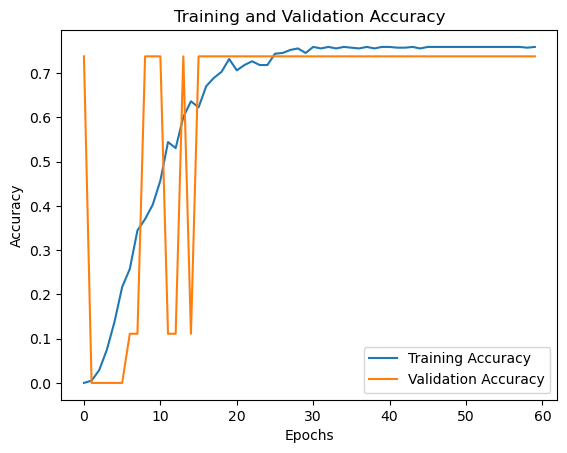

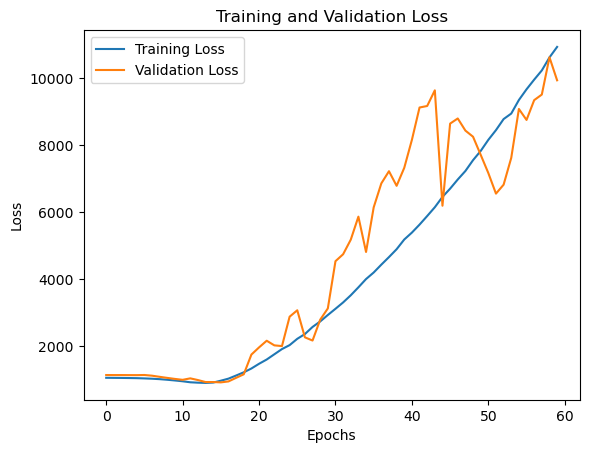

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()